<a href="https://colab.research.google.com/github/Sahlakm/Phishing-Detection/blob/main/Phishing_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import itertools
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from lightgbm import LGBMClassifier
import os
import seaborn as sns
from wordcloud import WordCloud

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
df1 = pd.read_csv('/gdrive/MyDrive/GRP 12: Project 2020-2024/Dataset/PhiUSIIL_Phishing_URL_Dataset.csv')
print(df1.shape)
print(df1.columns)
df1.head()

(235795, 56)
Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmp

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [4]:
df1 = df1.drop(df1.columns[[i for i in range(2,55)]], axis=1)
df1 = df1.drop(['FILENAME'],axis=1)

In [5]:
df1.rename(columns={'label': 'Label'}, inplace=True)
df1['Label'] = df1['Label'].replace(1, 'good')
df1['Label'] = df1['Label'].replace(0, 'bad')
df1.head()

,URL,Label
0,https://www.southbankmosaics.com,good
1,https://www.uni-mainz.de,good
2,https://www.voicefmradio.co.uk,good
3,https://www.sfnmjournal.com,good
4,https://www.rewildingargentina.org,good


In [6]:
df1.Label.value_counts()

Label
good    134850
bad     100945
Name: count, dtype: int64

In [ ]:
'''

with open('/content/ALL-phishing-links.txt', 'r') as file:
    phishing_urls = file.readlines()

# Strip newline characters from URLs
phishing_urls = [url.strip() for url in phishing_urls]

df3 = pd.DataFrame({'URL': phishing_urls, 'Label': 'bad'})

# df1.to_csv('new1_urls.csv', index=False)'''


"\n\nwith open('/content/ALL-phishing-links.txt', 'r') as file:\n    phishing_urls = file.readlines()\n\n# Strip newline characters from URLs\nphishing_urls = [url.strip() for url in phishing_urls]\n\ndf3 = pd.DataFrame({'URL': phishing_urls, 'Label': 'bad'})\n\n# df1.to_csv('new1_urls.csv', index=False)"

In [7]:
df2 = pd.read_csv('/gdrive/MyDrive/GRP 12: Project 2020-2024/Dataset/new_urls.csv')
print(df2.Label.value_counts())
df2.head()

Label
bad    696364
Name: count, dtype: int64


,URL,Label
0,http://news.fangsforum.com/view/613d3836714360...,bad
1,http://feaaxbok.com/,bad
2,http://isoport.info/fmicode/code.php/,bad
3,http://idmaps-icloud.com/fmicode/code.php/,bad
4,https://app-ced1f799-ab6e-4d60-a65a-f373a878ea...,bad


In [8]:
more_urls = [
    'https://chat.openai.com/c/9106adb5-8472-4c4f-b566-c8513b19fc32',
    'https://github.com/mitchellkrogza/Phishing.Database/blob/master/ALL-phishing-links.txt',
    'https://github.com/openphish/pyopdb',
    'https://wisdomml.in/malicious-url-detection-using-machine-learning-in-python/#Dataset_description',
    'https://www.youtube.com/watch?v=PogM1ox6Es4',
    'https://link.springer.com/article/10.1007/s40745-022-00379-8',
    'https://link.springer.com/article/10.1007/s40745-022-00379-8',
    'https://engineering.careers360.com/articles/cusat-cat-admit-card'
]

new_data = pd.DataFrame({'URL': more_urls, 'Label': 'good'})

df1 = pd.concat([df1, new_data], ignore_index=True)
df1 = df1[df1['Label'] != 'bad']

In [9]:
df2 = df2.sample(frac=1-0.80)

In [10]:
df = pd.concat([df1, df2], ignore_index=True)
df.to_csv('dataset.csv', index=False)
print(df.Label.value_counts())
df.head()

Label
bad     139273
good    134858
Name: count, dtype: int64


,URL,Label
0,https://www.southbankmosaics.com,good
1,https://www.uni-mainz.de,good
2,https://www.voicefmradio.co.uk,good
3,https://www.sfnmjournal.com,good
4,https://www.rewildingargentina.org,good


In [11]:
df_phish = df[df.Label=='bad']
df_good = df[df.Label=='good']

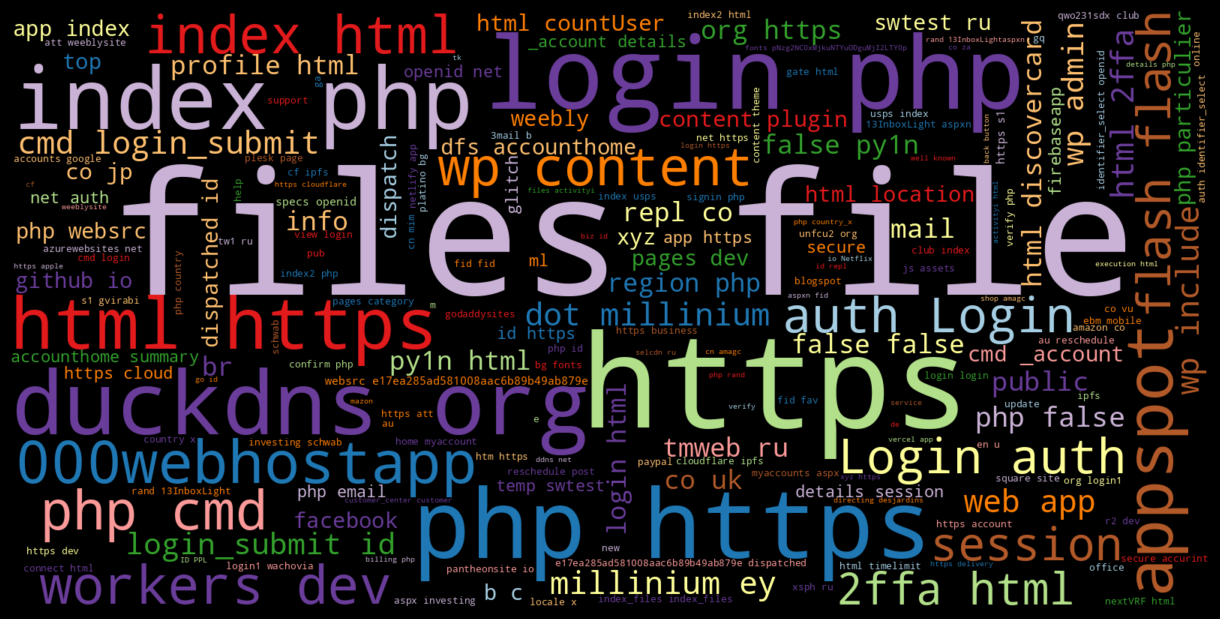

In [12]:
phish_url = " ".join(i for i in df_phish.URL)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(phish_url)
plt.figure( figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

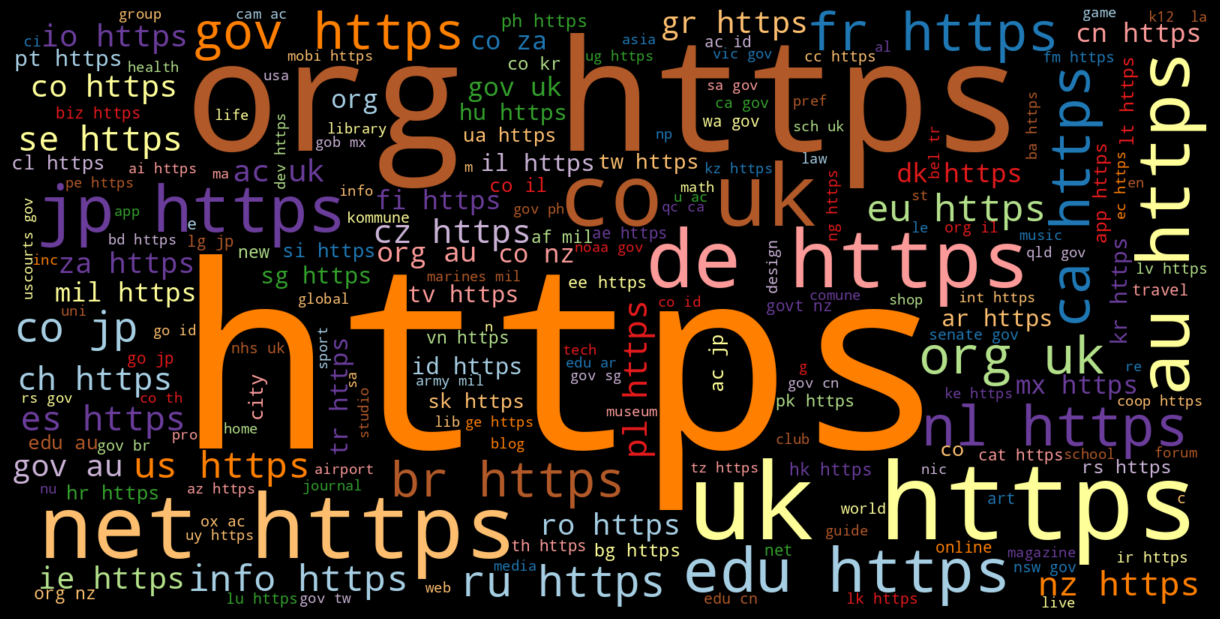

In [13]:
good_url = " ".join(i for i in df_good.URL)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(good_url)
plt.figure( figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [14]:
import re
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip'] = df['URL'].apply(lambda i: having_ip_address(i))

In [15]:
from urllib.parse import urlparse

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0


df['abnormal_url'] = df['URL'].apply(lambda i: abnormal_url(i))

In [16]:
from googlesearch import search
def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
df['google_index'] = df['URL'].apply(lambda i: google_index(i))

In [17]:
def count_dot(url):
    count_dot = url.count('.')
    return count_dot

df['count.'] = df['URL'].apply(lambda i: count_dot(i))
df.head()

,URL,Label,use_of_ip,abnormal_url,google_index,count.
0,https://www.southbankmosaics.com,good,0,1,1,2
1,https://www.uni-mainz.de,good,0,1,1,2
2,https://www.voicefmradio.co.uk,good,0,1,1,3
3,https://www.sfnmjournal.com,good,0,1,1,2
4,https://www.rewildingargentina.org,good,0,1,1,2


In [18]:
def count_www(url):
    url.count('www')
    return url.count('www')

df['count-www'] = df['URL'].apply(lambda i: count_www(i))

def count_atrate(url):

    return url.count('@')

df['count@'] = df['URL'].apply(lambda i: count_atrate(i))


def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

df['count_dir'] = df['URL'].apply(lambda i: no_of_dir(i))

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

df['count_embed_domian'] = df['URL'].apply(lambda i: no_of_embed(i))


def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0


df['short_url'] = df['URL'].apply(lambda i: shortening_service(i))

In [19]:
def check_phishing_terms(url):
    phishing_terms = ['login', 'update', 'validate', 'activate', 'secure', 'account', 'password', 'bank', 'paypal', 'verify', 'signin', 'confirm', 'alert', 'payment', 'info', 'support', 'service', 'amazon']

    url_lower = url.lower()


    for term in phishing_terms:
        if term in url_lower:
            return 1
    return 0

df['phish_terms'] = df['URL'].apply(lambda i: check_phishing_terms(i))

def count_uppercase(url):
    uppercase_count = 0
    for char in url:
        if char.isupper():
            uppercase_count += 1
    return uppercase_count

df['upper_case'] = df['URL'].apply(lambda i: count_uppercase(i))



In [20]:
def count_https(url):
    return url.count('https')

df['count-https'] = df['URL'].apply(lambda i : count_https(i))

def count_http(url):
    return url.count('http')

df['count-http'] = df['URL'].apply(lambda i : count_http(i))
def count_per(url):
    return url.count('%')

df['count%'] = df['URL'].apply(lambda i : count_per(i))

def count_ques(url):
    return url.count('?')

df['count?'] = df['URL'].apply(lambda i: count_ques(i))

def count_hyphen(url):
    return url.count('-')

df['count-'] = df['URL'].apply(lambda i: count_hyphen(i))

def count_equal(url):
    return url.count('=')

df['count='] = df['URL'].apply(lambda i: count_equal(i))

def url_length(url):
    return len(str(url))


#Length of URL
df['url_length'] = df['URL'].apply(lambda i: url_length(i))
#Hostname Length

def hostname_length(url):
    return len(urlparse(url).netloc)

df['hostname_length'] = df['URL'].apply(lambda i: hostname_length(i))

df.head()

def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['URL'].apply(lambda i: suspicious_words(i))


def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits


df['count-digits']= df['URL'].apply(lambda i: digit_count(i))


def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters


df['count-letters']= df['URL'].apply(lambda i: letter_count(i))

df.head()

,URL,Label,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embed_domian,...,count-http,count%,count?,count-,count=,url_length,hostname_length,sus_url,count-digits,count-letters
0,https://www.southbankmosaics.com,good,0,1,1,2,1,0,0,0,...,1,0,0,0,0,32,24,1,0,27
1,https://www.uni-mainz.de,good,0,1,1,2,1,0,0,0,...,1,0,0,1,0,24,16,0,0,18
2,https://www.voicefmradio.co.uk,good,0,1,1,3,1,0,0,0,...,1,0,0,0,0,30,22,0,0,24
3,https://www.sfnmjournal.com,good,0,1,1,2,1,0,0,0,...,1,0,0,0,0,27,19,0,0,22
4,https://www.rewildingargentina.org,good,0,1,1,2,1,0,0,0,...,1,0,0,0,0,34,26,0,0,29


In [21]:
pip install tld

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 3.7 MB/s eta 0:00:00


In [22]:

from urllib.parse import urlparse
from tld import get_tld
import os.path


#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['URL'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
df['tld'] = df['URL'].apply(lambda i: get_tld(i,fail_silently=True))


def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))
df = df.drop("tld",axis=1)
df.columns

Index(['URL', 'Label', 'use_of_ip', 'abnormal_url', 'google_index', 'count.',
       'count-www', 'count@', 'count_dir', 'count_embed_domian', 'short_url',
       'phish_terms', 'upper_case', 'count-https', 'count-http', 'count%',
       'count?', 'count-', 'count=', 'url_length', 'hostname_length',
       'sus_url', 'count-digits', 'count-letters', 'fd_length', 'tld_length'],
      dtype='object')

In [ ]:
pip install beautifulsoup4

In [ ]:
# Find all links in the webpage
def count_hyperlinks(hyperlinks):
    if len(hyperlinks) == 0:
      return 1
    else:
      return 0

In [ ]:
def internal_hp(hyperlinks,url):
    internal_count = 0
    total_count = len(hyperlinks)
    if total_count == 0:
        return 0
    base_domain = urlparse(url).netloc
    for link in hyperlinks:
        href = link.get('href')
        if href:
            parsed_href = urlparse(href)
            if parsed_href.netloc == base_domain:
                internal_count += 1
    ratio = internal_count / total_count

    if ratio >= 0.5:
        return 1
    else:
        return 0


In [ ]:
def external_hp(hyperlinks,url):
  external_count = 0
  total_count = len(hyperlinks)
  if total_count == 0:
        return 0
  base_domain = urlparse(url).netloc
  for link in hyperlinks:
      href = link.get('href')
      if href:
          parsed_href = urlparse(href)
          if parsed_href.netloc != base_domain and parsed_href.netloc != '':
              external_count += 1
  ratio = external_count / total_count
  if ratio < 0.5:
      return 0
  else:
      return 1

In [ ]:
def check_external_css(soup,url):
  link_tags = soup.find_all('link', rel='stylesheet')
  external_css_found = False
  base_domain = urlparse(url).netloc
  for link in link_tags:
      href = link.get('href')
      if href:
          parsed_href = urlparse(href)
          if parsed_href.netloc != base_domain and parsed_href.netloc != '':
              external_css_found = True
              break
  if external_css_found:
      return 1
  else:
      return 0

In [ ]:
def null_hp(soup):
  anchor_tags = soup.find_all('a')
  null_count = sum(1 for tag in anchor_tags if tag.get('href') in ['', '#', '#content', 'javascript:void(0)'])
  total_count = len(anchor_tags)
  if total_count == 0:
        return 0
  ratio = null_count / total_count
  if ratio > 0.34:
      return 1
  else:
      return 0

In [ ]:
def check_favicon(soup,url):
  favicon_link_tag = soup.find('link', rel='icon') or soup.find('link', rel='shortcut icon')
  if favicon_link_tag:
      favicon_href = favicon_link_tag.get('href')
      base_domain = urlparse(url).netloc
      parsed_favicon_href = urlparse(favicon_href)
      if parsed_favicon_href.netloc == base_domain:
          return 0
      else:
          return 1
  else:
      return 0

In [ ]:
from collections import Counter
def com_page(soup):
  anchor_tags = soup.find_all('a')
  hrefs = [tag.get('href') for tag in anchor_tags]
  anchor_link_counts = Counter(hrefs)
  if not anchor_link_counts:  # Check if anchor_link_counts is empty
        return 0
  most_common_anchor_link, most_common_count = anchor_link_counts.most_common(1)[0]
  ratio = most_common_count / len(anchor_tags)
  return ratio

In [ ]:
def com_page_footer(soup):
  footer = soup.find('footer')
  if not footer:
      return 0
  anchor_tags = footer.find_all('a')
  hrefs = [tag.get('href') for tag in anchor_tags]
  anchor_link_counts = Counter(hrefs)
  if not anchor_link_counts:  # Check if anchor_link_counts is empty
        return 0
  most_common_anchor_link, most_common_count = anchor_link_counts.most_common(1)[0]
  ratio = most_common_count / len(anchor_tags)
  return ratio

In [ ]:
def check_sfh_score(soup, url):
  form_tags = soup.find_all('form')
  sfh_score = 0
  base_domain = urlparse(url).netloc
  for form in form_tags:
      sfh = form.get('action')
      if not sfh or sfh == 'about:blank':
          sfh_score += 0.5
      elif urlparse(sfh).netloc != base_domain:
          sfh_score += 1
  if  sfh_score == 0:
      return 0
  else:
      return 1

In [ ]:
from bs4 import BeautifulSoup
import requests

def get_dom(url,idx):
  try:
    response = requests.get(url)
    html_content = response.text
    soup = BeautifulSoup(html_content, 'html.parser')
    hyperlinks = soup.find_all(['a', 'link', 'img'])

    # return BeautifulSoup(html_content, 'html.parser')
  except:
    pass
  else:
    df.loc[idx, 'count_hp'] = count_hyperlinks(hyperlinks)
    df.loc[idx, 'internal_hp_ratio'] = internal_hp(hyperlinks,url)
    df.loc[idx, 'external_hp_ratio'] = external_hp(hyperlinks,url)
    df.loc[idx, 'external_css'] = check_external_css(soup,url)
    df.loc[idx, 'null_hp_ratio'] = null_hp(soup)
    df.loc[idx, 'favicon'] = check_favicon(soup,url)
    df.loc[idx, 'com_page_ratio'] = com_page(soup)
    df.loc[idx, 'footer_ratio'] = com_page_footer(soup)
    df.loc[idx, 'sfh_score'] = check_sfh_score(soup,url)
    print(idx, url, df.loc[idx])

In [ ]:
column_names = ['count_hp', 'internal_hp_ratio', 'external_hp_ratio', 'external_css',
                'null_hp_ratio', 'favicon', 'com_page_ratio', 'footer_ratio', 'sfh_score']

for col in column_names:
    df[col] = np.NaN

print(df)

                                                      URL Label  use_of_ip  \
0                        https://www.southbankmosaics.com  good          0   
1                                https://www.uni-mainz.de  good          0   
2                          https://www.voicefmradio.co.uk  good          0   
3                             https://www.sfnmjournal.com  good          0   
4                      https://www.rewildingargentina.org  good          0   
...                                                   ...   ...        ...   
274126  http://onedrive.lqbby.workers.dev/5867a43b-558...   bad          0   
274127  http://139.59.15.134/online/CIBC/254232429d776...   bad          1   
274128               https://devjoynal.github.io/Facebook   bad          0   
274129                        http://sbi.mx/page/41/786/*   bad          0   
274130  https://ellatinodigital.com/stats/postbanknew/...   bad          0   

        abnormal_url  google_index  count.  count-www  count@  

In [ ]:
# df['URL'].apply(lambda i: get_dom(i))
idx=-1
df['URL'].apply(lambda url: get_dom(url, df.index[df['URL'] == url][0]))

Streaming output truncated to the last 5000 lines.
google_index                              1
count.                                    2
count-www                                 1
count@                                    0
count_dir                                 0
count_embed_domian                        0
short_url                                 0
phish_terms                               0
upper_case                                0
count-https                               1
count-http                                1
count%                                    0
count?                                    0
count-                                    0
count=                                    0
url_length                               21
hostname_length                          13
sus_url                                   0
count-digits                              0
count-letters                            16
fd_length                                 0
tld_length               

In [ ]:
# Find all links in the webpage
# soup = get_dom('https://link.springer.com/article/10.1007/s40745-022-00379-8')
# links = soup.find_all('a')
# print(links)
# Print the links
'''for link in links:
    print(link.get('href'))'''


In [ ]:
!nvidia-smi

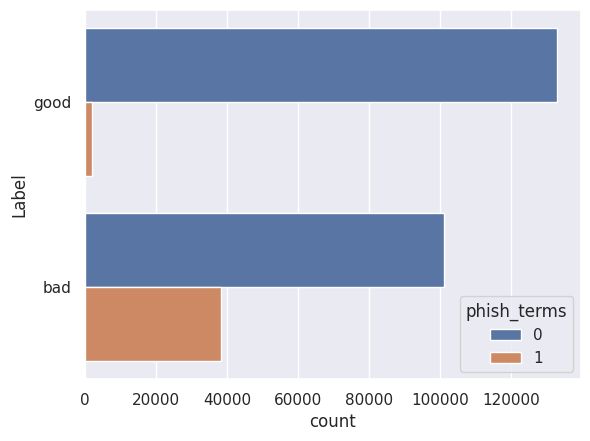

In [23]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(y="Label", data=df,hue="phish_terms")

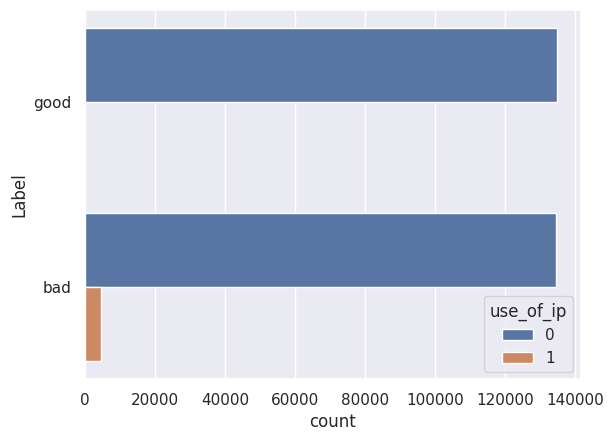

In [24]:
sns.set(style="darkgrid")
ax = sns.countplot(y="Label", data=df,hue="use_of_ip")

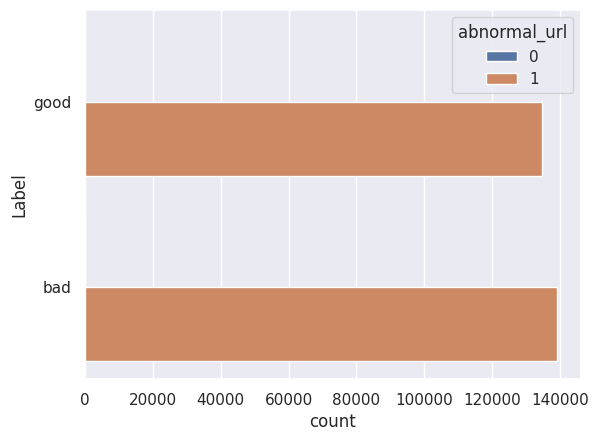

In [25]:
sns.set(style="darkgrid")
ax = sns.countplot(y="Label", data=df,hue="abnormal_url")

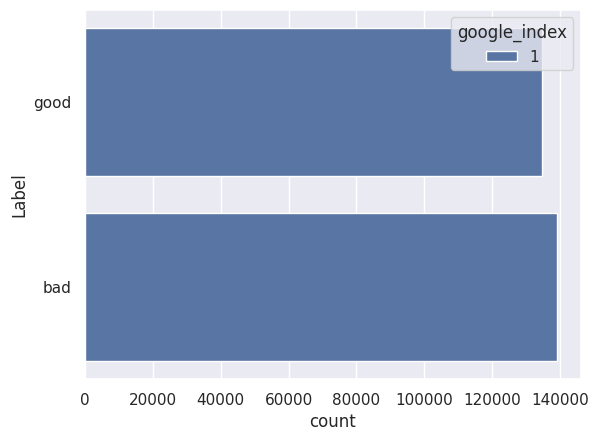

In [26]:
sns.set(style="darkgrid")
ax = sns.countplot(y="Label", data=df,hue="google_index")

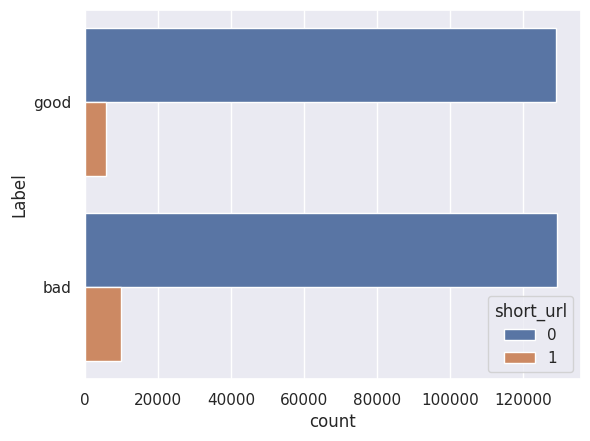

In [27]:
sns.set(style="darkgrid")
ax = sns.countplot(y="Label", data=df,hue="short_url")

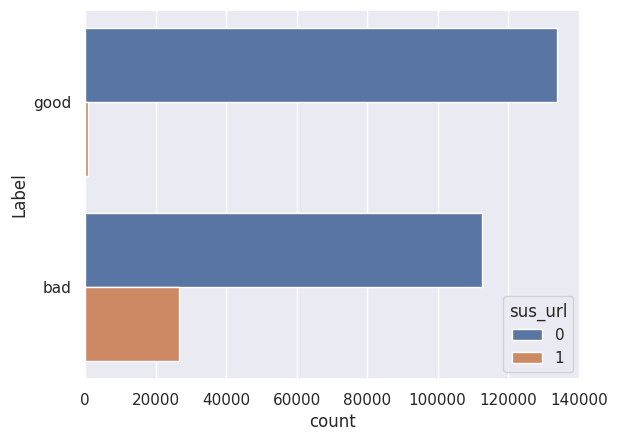

In [28]:
sns.set(style="darkgrid")
ax = sns.countplot(y="Label", data=df,hue="sus_url")

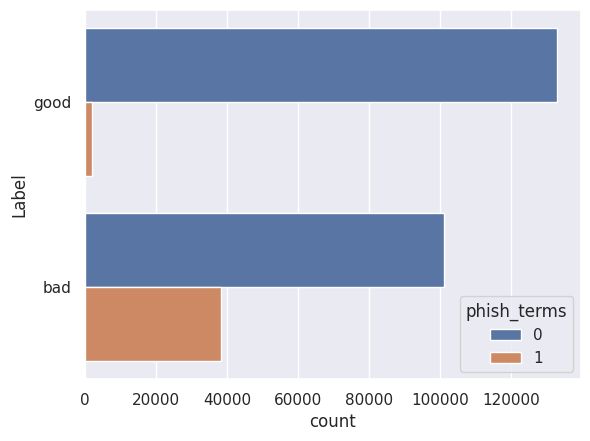

In [29]:
sns.set(style="darkgrid")
ax = sns.countplot(y="Label", data=df,hue="phish_terms")

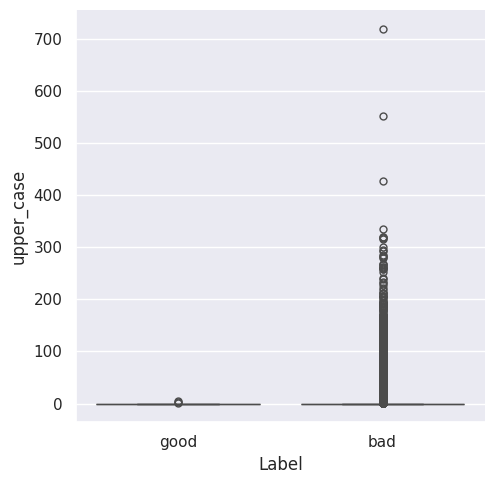

In [30]:
sns.set(style="darkgrid")
ax = sns.catplot(x="Label", y="upper_case", kind="box", data=df)

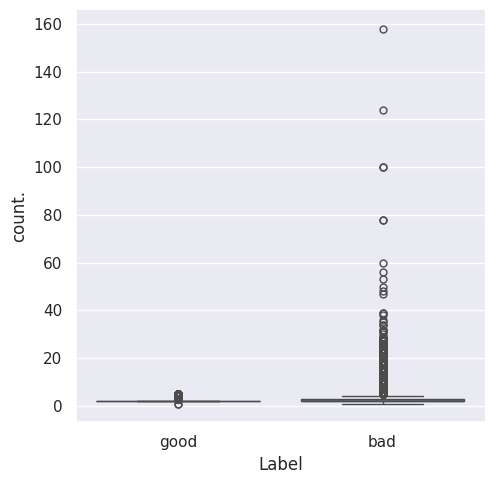

In [31]:
sns.set(style="darkgrid")
ax = sns.catplot(x="Label", y="count.", kind="box", data=df)

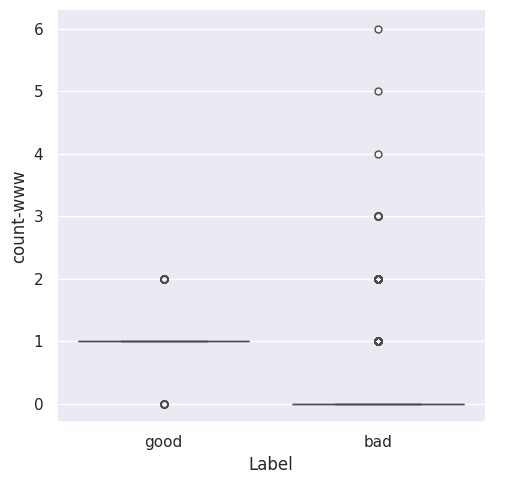

In [32]:
sns.set(style="darkgrid")
ax = sns.catplot(x="Label", y="count-www", kind="box", data=df)

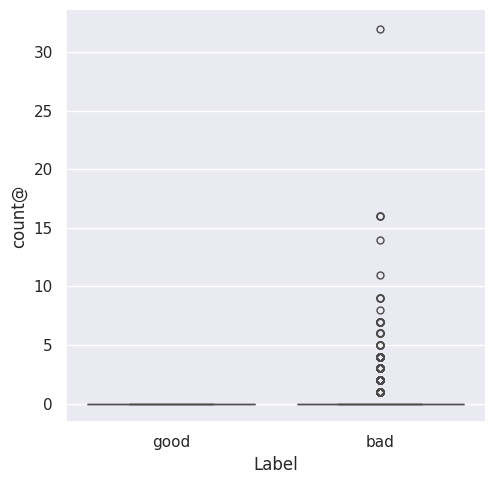

In [33]:
sns.set(style="darkgrid")
ax = sns.catplot(x="Label", y="count@", kind="box", data=df)

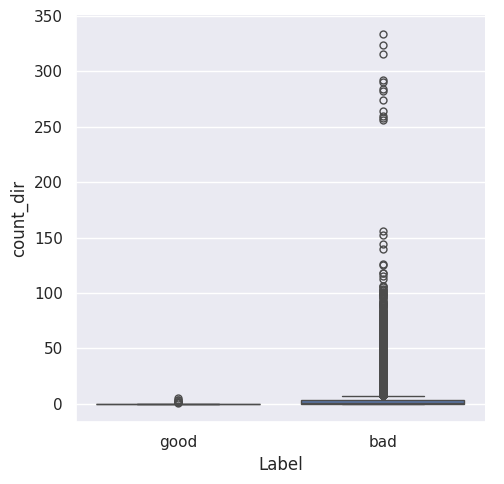

In [34]:
sns.set(style="darkgrid")
ax = sns.catplot(x="Label", y="count_dir", kind="box", data=df)

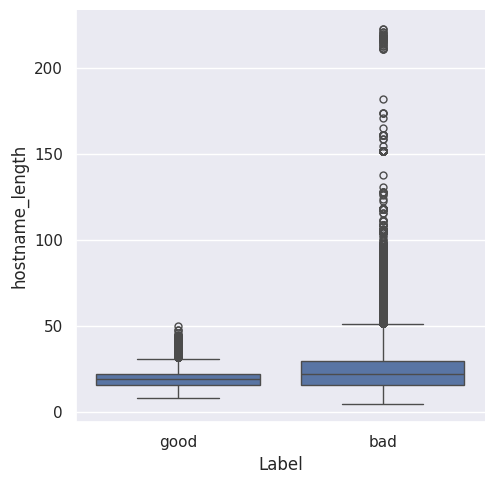

In [35]:
sns.set(style="darkgrid")
ax = sns.catplot(x="Label", y="hostname_length", kind="box", data=df)

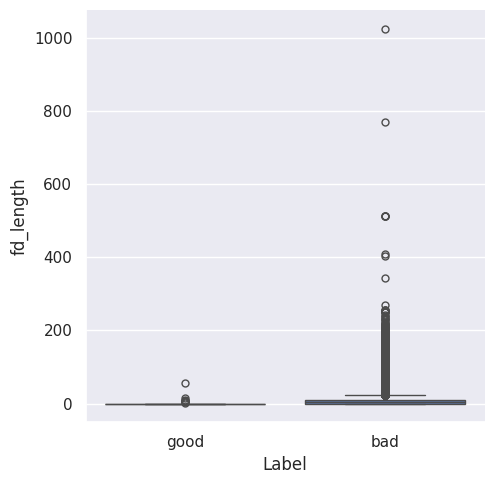

In [36]:
sns.set(style="darkgrid")
ax = sns.catplot(x="Label", y="fd_length", kind="box", data=df)

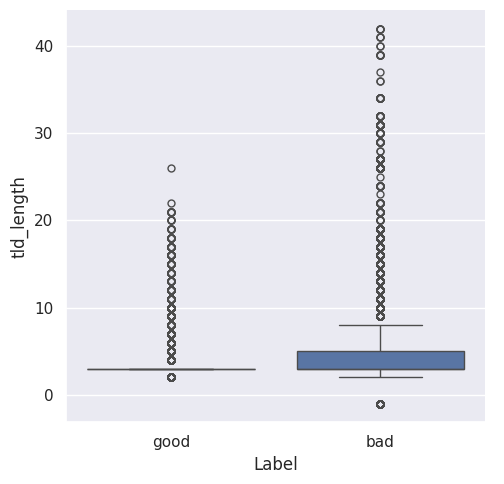

In [37]:
sns.set(style="darkgrid")
ax = sns.catplot(x="Label", y="tld_length", kind="box", data=df)

In [38]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["Label"])
df["type_code"].value_counts()

type_code
0    139273
1    134858
Name: count, dtype: int64

In [39]:
X = df[['use_of_ip', 'count.', 'count-www', 'count@', 'count_dir',
        'count_embed_domian', 'short_url','phish_terms', 'upper_case',
        'count-https', 'count-http', 'count%', 'count?', 'count-',
        'count=', 'url_length', 'hostname_length', 'sus_url',
        'count-digits', 'count-letters', 'fd_length', 'tld_length']]

y = df['type_code']

In [40]:
X.columns

Index(['use_of_ip', 'count.', 'count-www', 'count@', 'count_dir',
       'count_embed_domian', 'short_url', 'phish_terms', 'upper_case',
       'count-https', 'count-http', 'count%', 'count?', 'count-', 'count=',
       'url_length', 'hostname_length', 'sus_url', 'count-digits',
       'count-letters', 'fd_length', 'tld_length'],
      dtype='object')

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [42]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=100,max_features='sqrt')
rf.fit(X_train.values,y_train)
y_pred_rf = rf.predict(X_test.values)
print(classification_report(y_test,y_pred_rf,target_names=['good', 'bad']))


              precision    recall  f1-score   support

        good       1.00      1.00      1.00     27855
         bad       1.00      1.00      1.00     26972

    accuracy                           1.00     54827
   macro avg       1.00      1.00      1.00     54827
weighted avg       1.00      1.00      1.00     54827



In [43]:
import sklearn.metrics as metrics
score = metrics.accuracy_score(y_test, y_pred_rf)
print("accuracy:   %0.3f" % score)

accuracy:   1.000


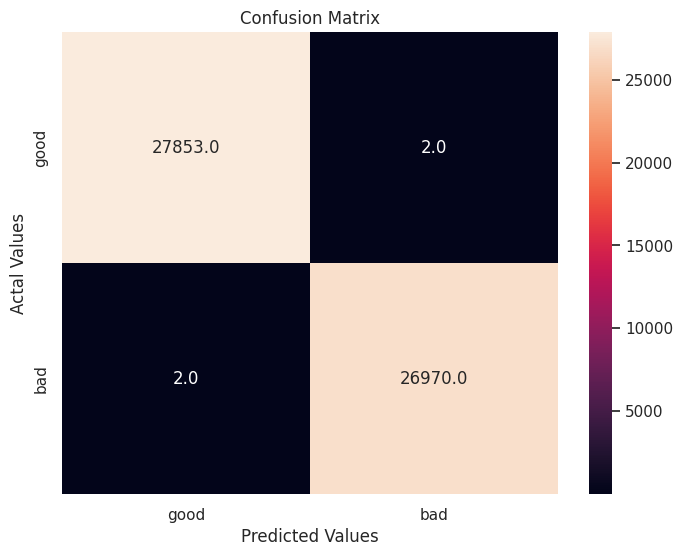

In [44]:
cm = confusion_matrix(y_test, y_pred_rf)
cm_df = pd.DataFrame(cm,
                     index = ['good', 'bad'],
                     columns = ['good', 'bad'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

<Axes: >

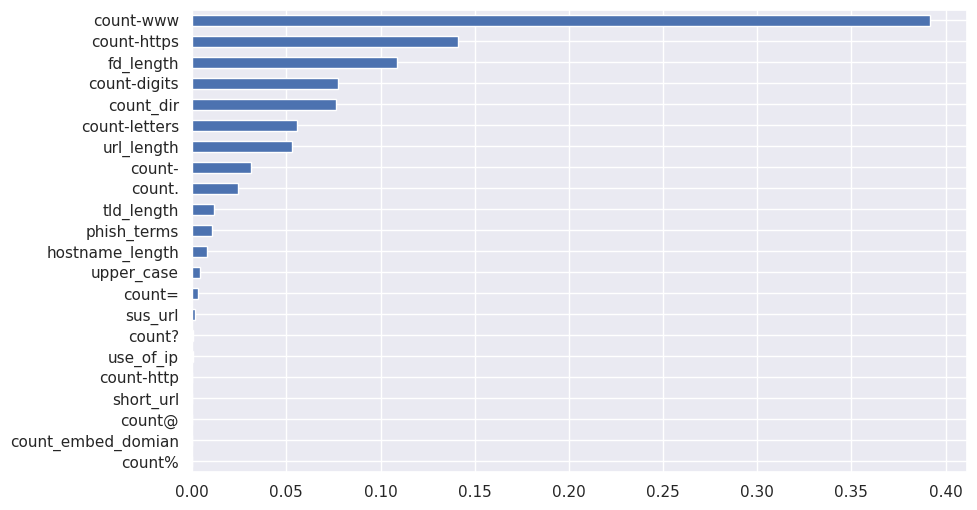

In [45]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6))

In [46]:
def main(url):

    status = []

    status.append(having_ip_address(url))
    # status.append(abnormal_url(url))
    status.append(count_dot(url))
    status.append(count_www(url))
    status.append(count_atrate(url))
    status.append(no_of_dir(url))
    status.append(no_of_embed(url))

    status.append(shortening_service(url))
    status.append(count_uppercase(url))
    status.append(check_phishing_terms(url))
    status.append(count_https(url))
    status.append(count_http(url))

    status.append(count_per(url))
    status.append(count_ques(url))
    status.append(count_hyphen(url))
    status.append(count_equal(url))



    status.append(url_length(url))
    status.append(hostname_length(url))
    status.append(suspicious_words(url))
    status.append(digit_count(url))
    status.append(letter_count(url))
    status.append(fd_length(url))
    tld = get_tld(url,fail_silently=True)

    status.append(tld_length(tld))




    return status

In [47]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    # Due to updates to scikit-learn, we now need a 2D array as a parameter to the predict function.
    features_test = np.array(features_test).reshape((1, -1))



    pred = rf.predict(features_test)
    if int(pred[0]) == 1:

        res="SAFE"
        return res
    elif int(pred[0]) == 0:

        res="PHISHING"
        return res

In [48]:
urls = ['https://research.google.com/colaboratory/faq.html']
for url in urls:
     print(get_prediction_from_url(url))

PHISHING
